In [1]:
#If opening in colab run this cell
!git clone https://github.com/CTVisMe/DS4B_Sp24.git
%cd DS4B_Sp24/Homeworks

fatal: destination path 'DS4B_Sp24' already exists and is not an empty directory.
/content/DS4B_Sp24/Homeworks


**SUBMIT BOTH IPYNB AND PDF VERSIONS OF THE HOMEWORK IN THE FORMAT OF LASTNAME_FIRSTNAME_HW3.IPYNB/PDF**








# Predicting Churn

After discussing the churn problem at TelCo with Nadia for a while (remember, from HW0?), you've finally defined an adequate target variable for churn and gathered relevant data to predict it. Moreover, the marketing department has come up with an amazing retention offer: the offer is guaranteed to convince customers to extend their contract for an extra year after receiving it. Unfortunately, the offer is quite expensive; it costs $200. __You have enough budget to give the retention offer to up to 25% of the customers whose contracts are expiring.__

It is your job to use data from previous contract expirations to build a churn predictive model and make a recommendation of whom to target with the offers. You have assembled the best historical data set you can at this point, which includes:

- Gender: Whether the customer is a male or a female
- SeniorCitizen: Whether the customer is a senior citizen or not (1, 0)
- Partner: Whether the customer has a partner or not (Yes, No)
- Dependents: Whether the customer has dependents or not (Yes, No)
- Tenure: Number of months the customer has stayed with the company
- PhoneService: Whether the customer has a phone service or not (Yes, No)
- MultipleLines: Whether the customer has multiple lines or not (Yes, No, No phone service)
- InternetService: Customer’s internet service provider (DSL, Fiber optic, No)
- OnlineSecurity: Whether the customer has online security or not (Yes, No, No internet service)
- OnlineBackup: Whether the customer has online backup or not (Yes, No, No internet service)
- DeviceProtection: Whether the customer has device protection or not (Yes, No, No internet service)
- TechSupport: Whether the customer has tech support or not (Yes, No, No internet service)
- StreamingTV: Whether the customer has streaming TV or not (Yes, No, No internet service)
- StreamingMovies: Whether the customer has streaming movies or not (Yes, No, No internet service)
- Contract: The contract term of the customer (Month-to-month, One year, Two year)
- PaperlessBilling: Whether the customer has paperless billing or not (Yes, No)
- PaymentMethod: The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
- MonthlyCharges: The amount charged to the customer monthly
- Churn: Whether the customer churned or not shortly after contract expiration (Yes or No)

__1. Load the churn data. The code below will also transform your categorical variables into dummy variables. No points for this. This is just meant to help you get started.__

In [2]:
import numpy as np
import pandas as pd

# If necessary change the path below so that it points to your file.
data_path = "./data/data-hw3.csv"

df = pd.read_csv(data_path)
df = pd.get_dummies(df, drop_first=True)

In [3]:
# Print the total number of rows and columns
print("Total number of rows:", df.shape[0])
print("Total number of columns:", df.shape[1])

# Show the first few rows in the dataset
print("\nFirst few rows in the dataset:")
df.head()

Total number of rows: 7032
Total number of columns: 30

First few rows in the dataset:


,SeniorCitizen,tenure,MonthlyCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,29.85,False,True,False,False,True,False,False,...,False,False,False,False,False,True,False,True,False,False
1,0,34,56.95,True,False,False,True,False,False,False,...,False,False,False,True,False,False,False,False,True,False
2,0,2,53.85,True,False,False,True,False,False,False,...,False,False,False,False,False,True,False,False,True,True
3,0,45,42.30,True,False,False,False,True,False,False,...,False,False,False,True,False,False,False,False,False,False
4,0,2,70.70,False,False,False,True,False,False,True,...,False,False,False,False,False,True,False,True,False,True


In [4]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208
std,0.368844,24.545260,30.085974
min,0.000000,1.000000,18.250000
25%,0.000000,9.000000,35.587500
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.862500
max,1.000000,72.000000,118.750000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 30 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          7032 non-null   int64  
 1   tenure                                 7032 non-null   int64  
 2   MonthlyCharges                         7032 non-null   float64
 3   gender_Male                            7032 non-null   bool   
 4   Partner_Yes                            7032 non-null   bool   
 5   Dependents_Yes                         7032 non-null   bool   
 6   PhoneService_Yes                       7032 non-null   bool   
 7   MultipleLines_No phone service         7032 non-null   bool   
 8   MultipleLines_Yes                      7032 non-null   bool   
 9   InternetService_Fiber optic            7032 non-null   bool   
 10  InternetService_No                     7032 non-null   bool   
 11  Onli

In [6]:
df.isna().sum()

SeniorCitizen                            0
tenure                                   0
MonthlyCharges                           0
gender_Male                              0
Partner_Yes                              0
Dependents_Yes                           0
PhoneService_Yes                         0
MultipleLines_No phone service           0
MultipleLines_Yes                        0
InternetService_Fiber optic              0
InternetService_No                       0
OnlineSecurity_No internet service       0
OnlineSecurity_Yes                       0
OnlineBackup_No internet service         0
OnlineBackup_Yes                         0
DeviceProtection_No internet service     0
DeviceProtection_Yes                     0
TechSupport_No internet service          0
TechSupport_Yes                          0
StreamingTV_No internet service          0
StreamingTV_Yes                          0
StreamingMovies_No internet service      0
StreamingMovies_Yes                      0
Contract_On

__2. Split the data into 80% training data and 20% test data.__

In [7]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score

In [8]:
# Your code goes here

# Separate features (X) and target variable (y)
X = df.drop(columns=['Churn_Yes'])
y = df['Churn_Yes']

# Split the data into training and test sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

__3. Build the best model you can using a decision tree classifier. Using 10-fold Cross-validation on the TRAINING set, try several values between 10 and 200 for the hyperparameter `min_samples_leaf`.__ You can use a for loop or `GridSearchCV` for this (do not use the TEST data at all for this example).  Report the best value of the parameter `min_samples_leaf` and the AUC associated with it.   

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

In [10]:
# Your code goes here

In [11]:
# Define the decision tree classifier
dt_classifier = DecisionTreeClassifier(criterion="entropy")

# Define the hyperparameters to tune
param_grid = {'min_samples_leaf': range(10, 201)}

# Perform GridSearchCV with 10-fold cross-validation
grid_search = GridSearchCV(dt_classifier, param_grid, cv=10, scoring='roc_auc')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and the corresponding AUC score
best_min_samples_leaf = grid_search.best_params_['min_samples_leaf']
best_auc_score_dt = grid_search.best_score_

print("Best min_samples_leaf:", best_min_samples_leaf)
print("AUC associated with the best min_samples_leaf:", round(best_auc_score_dt*100, 3))

Best min_samples_leaf: 123
AUC associated with the best min_samples_leaf: 83.301


**4.  Do the same for logistic regression.  Try different values for the hyperparameter C between 10 and 200**


In [12]:
# Your code goes here

In [13]:
from sklearn.linear_model import LogisticRegression

# Define the logistic regression classifier
lr_classifier = LogisticRegression(max_iter=10000)

# Define the hyperparameters to tune
param_grid = {'C': np.linspace(10, 200, num=10)}  # 20 values between 10 and 200

# Perform GridSearchCV with 10-fold cross-validation
grid_search_lr = GridSearchCV(lr_classifier, param_grid, cv=10, scoring='roc_auc')
grid_search_lr.fit(X_train, y_train)

# Get the best hyperparameters and the corresponding AUC score
best_C = grid_search_lr.best_params_['C']
best_auc_score_lr = grid_search_lr.best_score_

print("Best C:", round(best_C))
print("AUC associated with the best C:", round(best_auc_score_lr*100, 3))

Best C: 52
AUC associated with the best C: 83.927


**5.  Now do a third classification model of your choice. You can use something we learned in class or something else you want to try!  SVM, kNN, NeuralNet, RandomForest etc .  Whatever model you choose -- pick a hyperparameter and try and optimize.**


In [14]:
# Your code goes here
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score

# Dictionary to hold best hyperparameters and AUC scores
best_params = {}
best_auc_scores = {}

# Perform GridSearchCV with cross-validation

param_grids = {
    'alpha': np.logspace(-4, 2, num=7)  # Regularization parameter for NeuralNet
}

model = MLPClassifier(max_iter=1000)

grid_search = GridSearchCV(model, param_grids, cv=10, scoring='roc_auc')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and the corresponding AUC score
best_param_nn = grid_search.best_params_
best_auc_score_nn = grid_search.best_score_

print(f"Best parameters for NeuralNet: {best_param_nn}")
print(f"AUC associated with the best parameters: {round(best_auc_score_nn*100, 3)}\n")

Best parameters for NeuralNet: {'alpha': 0.001}
AUC associated with the best parameters: 84.157



__6.  Select a "best" model based on your three models above, what is it?__  

In [15]:
# Your code goes here

# Add AUC scores for Decision Tree and Logistic Regression
best_auc_scores= {}
best_auc_scores['Decision Tree'] = round(best_auc_score_dt*100,3)
best_auc_scores['Logistic Regression'] = round(best_auc_score_lr*100,3)
best_auc_scores['NeuralNet'] = round(best_auc_score_nn*100, 3)

# Display the AUC scores for each model
for name, auc_score in best_auc_scores.items():
    print(f"AUC score for {name}: {auc_score}")

# Select the model with the highest AUC score
best_model = max(best_auc_scores, key=best_auc_scores.get)
print(f"The best model based on AUC score is {best_model} with AUC score of {best_auc_scores[best_model]:.4f}")

AUC score for Decision Tree: 83.301
AUC score for Logistic Regression: 83.927
AUC score for NeuralNet: 84.157
The best model based on AUC score is NeuralNet with AUC score of 84.1570


The best model here  is NeuralNet with highest accuracy of 84.157% compared to various models.

__7. Use your TEST  data to plot the ROC Curves for each of the three best models you found in the previous question (make sure to plot the three curves together on the same plot). Would you consider changing your model choice after looking at the curves?__

HINT: There are some helpful code hints below, but you will need to edit them with the right arguments!!

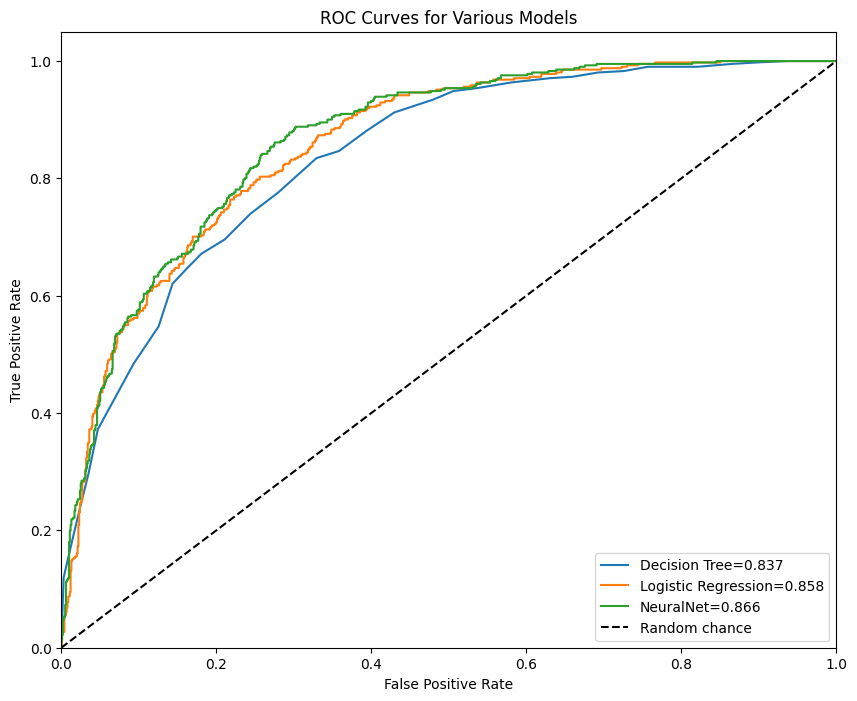

In [16]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier

# Define models with best parameters found earlier
best_models = {
    'Decision Tree': DecisionTreeClassifier(min_samples_leaf=best_min_samples_leaf),
    'Logistic Regression': LogisticRegression(C=best_C, max_iter=10000),
    'NeuralNet': MLPClassifier(max_iter=1000, **best_param_nn),
}

# Fit models on the entire training data
for name, model in best_models.items():
    model.fit(X_train, y_train)

# Plot ROC curves
plt.figure(figsize=(10, 8))
for name, model in best_models.items():
    # Determine probabilities of churn from the TEST data
    probs = model.predict_proba(X_test)[:, 1]
    # Use "roc_curve" to get the points for the ROC curve
    fpr, tpr, _ = roc_curve(y_test, probs)
    # Plot ROC curve
    auc = round(roc_auc_score(y_test, probs), 3)
    plt.plot(fpr, tpr, label=f"{name}={auc}")

plt.plot([0, 1], [0, 1], 'k--', label='Random chance')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Various Models')
plt.legend(loc="lower right")
plt.show()


**Answer:**
From the ROC curve graph, the NeuralNet's curve is consistently above the others, it would be the best model among those compared. Also the AUC values is highest.



**Question: Would you consider changing your model choice after looking at the curves?**

**Answer:**
The NeuralNet model's superior performance on these metrics indicates it is more effective at distinguishing between positive (churn) and negative (no churn) cases across a range of thresholds.</br>

The ROC curve's higher positioning for the NeuralNet model signifies a better balance between the true positive rate and false positive rate, essential for making accurate predictions in this context. Since the goal is to accurately identify customers at risk of churning—especially in scenarios involving costly interventions like retention offers—the model that provides the best discriminatory ability is preferable.</br>

Therefore, based on the evaluation of the ROC curves and AUC scores, there would be no reason to change the model choice away from the NeuralNet. It appears to be the most appropriate option for predicting customer churn in this scenario.</br>








__8. What are the costs and benefits of this offer?  HINT: Take a look at the description of the data and the retention offer. You can think in terms of averages across all customers.__

Put your answer here using Markdown.</br>
**Answer:**

In [17]:
# Correcting the error by using the right DataFrame and column
avg_customer_profit = round(X_train['MonthlyCharges'].mean() * 12, 3)

# Display the calculated average annual profit per customer
print(avg_customer_profit)

781.334


The cost and benefits depends on the type of customer we target, churned or no churned.

### Cost-Benefit Analysis

1. **Costs**:
   - **Fixed Costs**: The retention offer costs $200 per customer.
   - **Variable Costs**: There are no additional variable costs explicitly mentioned, so the primary outlay is the cost of the retention offer itself.

2. **Benefits**:
   - The benefits come from saving the charges for a customer who would otherwise churn.
   - Assuming an average monthly charge across all customers and multiplying by 12 to get the annual value gives the total revenue saved per retained customer.

Lets consider the components involved in Cost Benefit Matrix

True positive: When model classifies a customer churn and it's actually a churn, i.e customer was set to leave. Here, the benefit is Revenue generated by the customer annually is 781.334 −200  (cost) = 581.334$

False positive: When model classifies a customer churn but its not, still we send offer to the customer, hence benefit is -200$

False negative: When model classfies a customer no churn but it is, and so we don't send an offer to customer, hence benefit = 0.

True Negative: When model correctly classifies a customer not churn, so we don't extend an offer to the customer, hence benefit =0

Cost/Benefit Matrix =

In [18]:
unit_cost = 200

cost_matrix = pd.DataFrame([[avg_customer_profit - unit_cost, - unit_cost], [0, 0]], columns=['p', 'n'], index=['Y', 'N'])
print ("Cost matrix")
print (cost_matrix)

Cost matrix
         p    n
Y  581.334 -200
N    0.000    0


__9. Using your best model along with the costs and benefits, now we want to plot a PROFIT CURVE.  Split your TRAINING data into two sets, one with 90% of the TRAINING data (the "SUB-TRAINING" set) and another with 10% of the TRAINING data (the VALIDATION set). Train the model you selected with the "SUB-TRAINING" set, apply it to the VALIDATION set, and plot a profit curve by sorting customers according to their probability of churning.   Calculate the profit at each threshold, and show the appropriate plot.  Make a recommendation to Nadia of the appropriate threshold to use - aka how many people to target with the retention incentive according to this profit curve.__

In [19]:
# Your code goes here

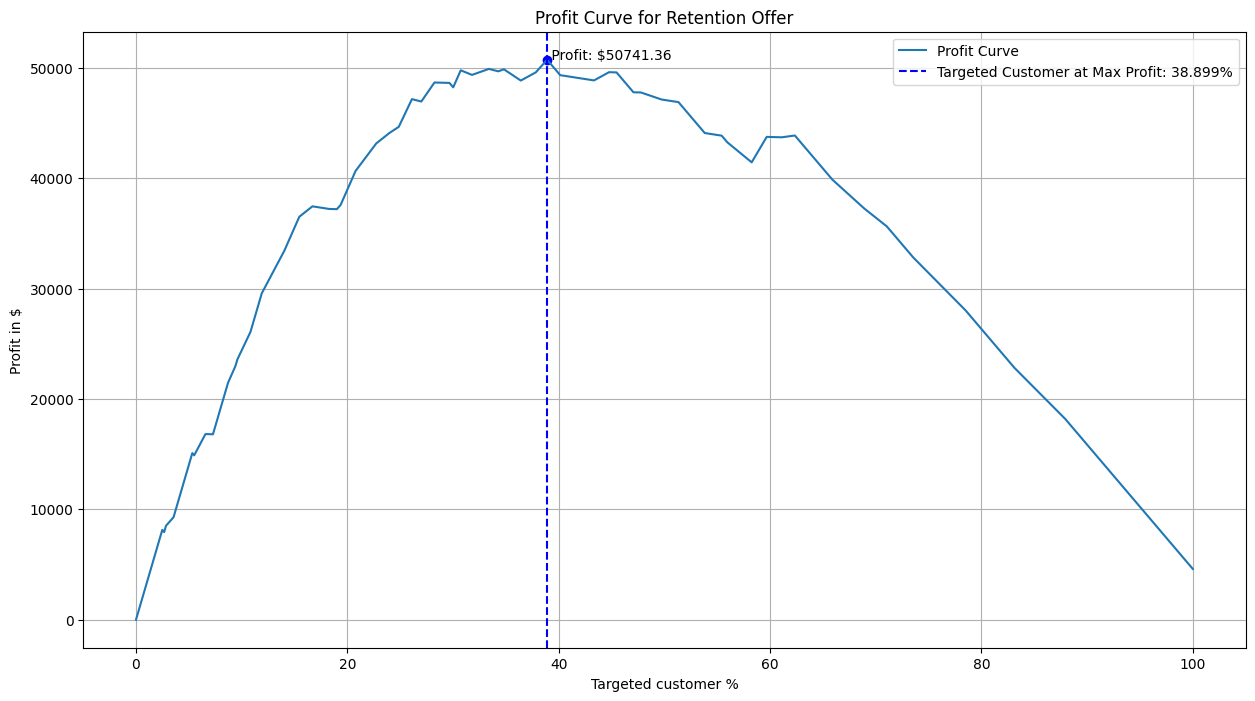

Optimal threshold for targeting offers: 0.27
Maximum profit: $50741.36 and customer percentage targeted 38.90%


In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt

# Assuming Xtr and ytr are already defined as the training data and labels
# Split the train dataset further into sub-train and validation
Xtr_tr, Xtr_val, ytr_tr, ytr_val = train_test_split(X_train, y_train, test_size=0.1, random_state=123)

# Train the model with the best parameters (adjust these parameters as needed)
model = MLPClassifier(max_iter=1000, alpha=0.1, random_state=123)
model.fit(Xtr_tr, ytr_tr)

# Get predictions
ytr_pred = model.predict_proba(Xtr_val)[:, 1]

# Sort the predictions
order = ytr_pred.argsort()[::-1]

# Set the cost per offer
cost_per_offer = 200

# Lists to store intermediate values for profits, costs, and targeted customers
profits = []
targeted_customers = []

# Calculate average annual charge of customer using average MonthlyCharges of customer * 12 months
avg_customer_profit_annual = X_train['MonthlyCharges'].mean() * 12

thresholds = np.linspace(0, 1, 101)
# Iterate for each threshold
for threshold in thresholds:
    # Calculate total number of targeted customers according to threshold
    total_targeted = np.sum(ytr_pred[order] >= threshold)

    # Calculate total number of customers model predicted to churn which were actually churned
    saved_customers = np.sum((ytr_pred[order] >= threshold) & (ytr_val.iloc[order].values==1))

    # Profit generated through the saved customers
    saved_customer_profit = saved_customers * avg_customer_profit_annual

    # Overall cost
    total_cost = total_targeted * cost_per_offer

    # Total profit
    total_profit = saved_customer_profit - total_cost

    # Append calculated values to lists
    targeted_customers.append((total_targeted / len(Xtr_val)) * 100)  # percentage of total customers targeted
    profits.append(total_profit)

# Find the optimal threshold and corresponding profit
max_profit_index = np.argmax(profits)
max_profit = profits[max_profit_index]
optimal_threshold = thresholds[max_profit_index]
customer_percentage = targeted_customers[max_profit_index]

# Plot the profit curve
plt.figure(figsize=(15, 8))
plt.plot(targeted_customers, profits, label='Profit Curve')
plt.axvline(x=customer_percentage, color='blue', linestyle='--', label=f'Targeted Customer at Max Profit: {customer_percentage:.3f}%')
plt.scatter(customer_percentage, max_profit, color='blue')
plt.text(customer_percentage, max_profit, f' Profit: ${max_profit:.2f}', horizontalalignment='left')

plt.xlabel('Targeted customer %')
plt.ylabel('Profit in $')
plt.title('Profit Curve for Retention Offer')
plt.legend()
plt.grid(True)
plt.show()

print(f"Optimal threshold for targeting offers: {optimal_threshold:.2f}")
print(f"Maximum profit: ${max_profit:.2f} and customer percentage targeted {customer_percentage:.2f}%")


**Question: Make a recommendation to Nadia of the appropriate threshold to use - aka how many people to target with the retention incentive according to this profit curve.**

**Answer:**
Based on the profit curve and the calculated figures, it's recommended that Nadia targets the top 38.90% of customers who are most likely to churn according to the model's prediction probabilities. This targeting strategy is optimal because it maximizes profit at $50,741.36.

It's important to note that targeting just the top 25% would not yield the maximum possible profit. Even though the strategy of targeting a specific percentage of customers, such as 25%, might seem appealing for its simplicity, the profit curve indicates that a slightly higher threshold that results in targeting approximately 39% of customers will be more beneficial in terms of revenue.


For targeting 25% of customers, the optimal threshold is 0.41, which results in $44664.02 in profits.


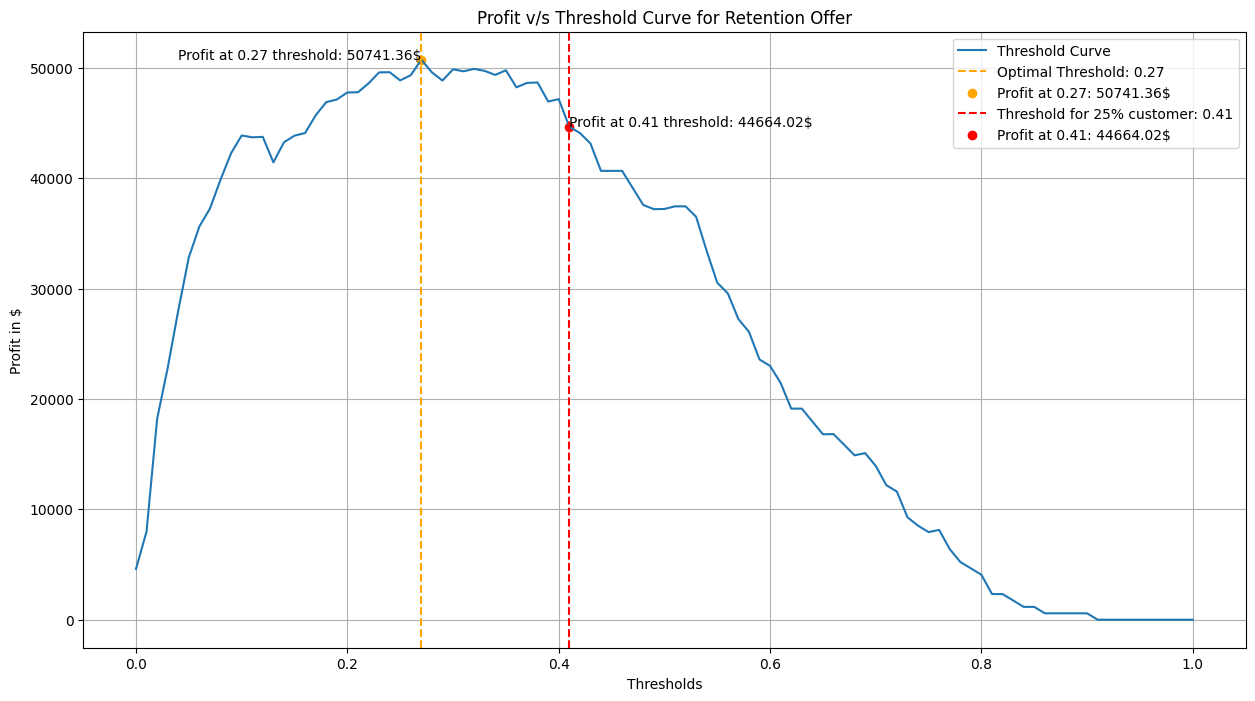

In [30]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate index when 25% customers are targeted from targeted_customers array
# Here, you're looking for the first instance where the percentage of targeted customers exceeds or equals 25%
index_25 = np.where(np.array(targeted_customers) <= 25)[0][0]

# Calculate threshold at index_25
threshold_25 = round(thresholds[index_25],3)

# Print the threshold and profit for targeting 25% of customers
print(f"For targeting 25% of customers, the optimal threshold is {threshold_25}, which results in ${profits[index_25]:.2f} in profits.")

optimal_threshold = thresholds[profits.index(max_profit)]


plt.figure(figsize=(15, 8))
plt.plot(np.linspace(0, 1, 101), profits, label='Threshold Curve')
plt.axvline(x=optimal_threshold, color='orange', linestyle='--', label=f'Optimal Threshold: {optimal_threshold}')
plt.scatter(optimal_threshold, max_profit, color='orange', label=f'Profit at {optimal_threshold}: {max_profit:.2f}$')
plt.text(optimal_threshold, max_profit, s=f'Profit at {optimal_threshold} threshold: {max_profit:.2f}$', horizontalalignment='right')

plt.axvline(x=threshold_25, color='red', linestyle='--', label=f'Threshold for 25% customer: {threshold_25}')
plt.scatter(threshold_25, profits[index_25], color='red', label=f'Profit at {threshold_25}: {profits[index_25]:.2f}$')
plt.text(threshold_25, profits[index_25], s=f'Profit at {threshold_25} threshold: {profits[index_25]:.2f}$', horizontalalignment='left')

plt.xlabel('Thresholds')
plt.ylabel('Profit in $')
plt.title('Profit v/s Threshold Curve for Retention Offer')
plt.legend()
plt.grid(True)
plt.show()


The profit curve graph indicates that while the optimal threshold for maximizing profit is 0.27, with an associated profit of  \$ 50,741.36, the threshold for targeting 25% of customers is 0.41, yielding a profit of  \$44,664.02.


If Nadia's strategy prioritizes balancing between maximizing profit and limiting the number of customers who receive the retention offer to approximately 25%, then the recommended threshold to use would be 0.41. This threshold aligns with the goal of targeting a more manageable segment of the customer base while still achieving a substantial profit.

__10. Now that you have chosen a model and a threshold, it is time to evaluate the potential impact of your solution on the holdout set. Using the results from your targeting above, how much money do you estimate that your recommendation would have saved as compared to giving the offer to a random set of customers?__

In [22]:
# Your code goes here

In [26]:
# Calculate the churn probability for the test sample using the trained model
y_pred_prob = model.predict_proba(X_test)[:, 1]

# Identify the customers who are most likely to churn based on the probability being higher than the threshold identified for 25% targeting
y_pred = y_pred_prob >= threshold_25

# Order the predictions in descending order so that customers with the highest probability of churning are first
order = y_pred.argsort()[::-1]

# Sort both the predicted churn probabilities and the actual churn labels in the test set according to the order of predicted probabilities
y_pred_sorted = y_pred[order]
yts_sorted = np.array(y_test)[order]

# Create a DataFrame combining the test set features with their respective sorted predicted and actual churn values for further analysis
sorted_test_df = pd.concat((X_test.iloc[order], y_test.iloc[order]), axis=1)

sorted_test_df


,SeniorCitizen,tenure,MonthlyCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
252,1,1,40.20,True,True,False,False,True,False,False,...,True,False,False,False,False,False,False,True,False,True
4286,0,14,89.80,False,False,False,True,False,False,True,...,True,False,True,False,False,True,False,False,True,True
1887,1,4,50.95,True,False,False,False,True,False,False,...,True,False,True,False,False,True,True,False,False,False
723,1,33,94.50,True,True,False,True,False,True,True,...,True,False,True,False,False,True,False,True,False,True
4536,0,1,80.55,True,True,False,True,False,False,True,...,True,False,False,False,False,True,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1974,0,45,20.00,False,True,True,True,False,False,False,...,False,True,False,False,True,True,False,False,False,False
3529,0,64,109.20,True,True,True,True,False,True,True,...,True,False,True,False,True,True,True,False,False,False
6260,0,35,33.45,False,False,False,False,True,False,False,...,False,False,False,False,False,True,False,False,True,False
1085,0,16,74.75,False,False,False,True,False,True,True,...,False,False,False,False,False,True,True,False,False,False


Here we can see 1407 customers are predicted to be churned by the model using the threshold we found in last question. So, we will be targeting those customers, irrespective of whether they are churned or not

In [24]:
# Display the total number of customers in the test set
print(f"Total number of customers in the observation: {len(X_test)}")

# Calculate and display the actual number of customers who churned
print(f"\nTotal number of actual churned customer : {np.sum(y_test==True)}")
# Calculate and display the number of churned customers as predicted by the model
print(f"Total number of churned customer predicted by model: {np.sum(y_pred_sorted)}")

# Determine the number of customers the model correctly predicted would churn and were actually saved
saved_customers = np.sum((y_pred_sorted) & (yts_sorted==True))
print(f"\nNumber of customers saved by model from churning: {saved_customers} ")

# Calculate the profit, taking into account the individual monthly charges of each customer who was saved,
# and multiply by 12 to annualize those charges, then subtract the cost per offer made
profit = saved_customers*avg_customer_profit - cost_per_offer*np.sum(y_pred)
print(f"\nProfit with Average Monthly Charges: {round(profit,3)}$")

# Take a random sample from the test set equal to the number of predicted churns
random_churn = X_test.sample(n= np.sum(y_pred))

# Calculate the profit for a random selection of customers: sum the monthly charges of actually churned customers,
# annualize this sum, and subtract the cost of making offers to the entire random sample
churned_customers = np.sum((y_test[random_churn.index]==True) )
print(f"\nTotal number of churned customer in random sample: {churned_customers}")
random_profit = churned_customers*avg_customer_profit - cost_per_offer*len(random_churn)
print(f"Profit generaed through Random Selection: {round(random_profit, 3)}$")

# Compute and display the difference in profit between the model's targeted approach and a random selection approach
difference = round(profit - random_profit, 3)
print(f"Difference between profit by Model and Random selection: {difference}$")

Total number of customers in the observation: 1407

Total number of actual churned customer : 411
Total number of churned customer predicted by model: 320

Number of customers saved by model from churning: 232 

Profit with Average Monthly Charges: 117269.488$

Total number of churned customer in random sample: 99
Profit generaed through Random Selection: 13352.066$
Difference between profit by Model and Random selection: 103917.422$


**Answer:**</br>

We can clearly see a substantial difference between the profit predicted by the model using a specific threshold and the profit generated by selecting customers randomly.

In our test dataset containing 1407 samples, there were 411 actual churned customers. Our model successfully identified 320 customers who were likely to churn, and out of those, it accurately predicted 232 customers who would have churned without intervention.

By targeting these customers, the model-driven approach yielded a profit of  \$ 117,269.488. This contrasts sharply with the random selection approach, which resulted in a significantly lower profit of \$13,352.066. Thus, by using the model's recommendations to target the retention offers, we estimate that the company would have saved an additional  \$103,917.422 as compared to a random selection strategy.

__11.  Is there a better way to rank customers to take advantage of their individual spending - rather than using an average across all customers?  Calculate an individualized expected value for profit/loss for each customer to rank them. Use it to plot a profit curve according to this new ranking.  Do the same comparison against a random set as you did in number 10.  Are the results any better? Would your recommendation change?__

In [25]:
print(f"Total number of customers in the observation: {len(X_test)}")

print(f"\nTotal number of actual churned customer : {np.sum(y_test==True)}")
print(f"Total number of churned customer predicted by model: {np.sum(y_pred_sorted)}")

saved_customers = np.sum((y_pred_sorted) & (yts_sorted==True))
print(f"\nNumber of customers saved by model from churning: {saved_customers} ")


#calcualte profit using individualized MonthlyCharges values of each customer and multiplied by 12 to get annual charges
profit = X_test.loc[(y_pred_sorted) & (yts_sorted==True)]['MonthlyCharges'].sum()*12 - cost_per_offer*np.sum(y_pred)

print(f"\nIndividualized expected value for profit {round(profit,3)}$")

#selected random samples eqaual to number of predictions greater than threshold (y_pred)
random_churn = X_test.sample(n= np.sum(y_pred))

churned_customers = np.sum((y_test[random_churn.index]==True) )
print(f"\nTotal number of churned customer in random sample: {churned_customers}")

#calcualte rnadom Profit, for each customer in sample who are acutally churned,
# sum total monthly charges to get profit
random_profit = random_churn.loc[(y_test[random_churn.index]==True)]['MonthlyCharges'].sum()*12 - cost_per_offer*len(random_churn)
print(f"Profit generaed through Random Selection: {round(random_profit, 3)}$")

#difference between individualized profit and random_profit
difference = round(profit - random_profit, 3)
print(f"Difference between profit by Model and Random selection:  {difference}$")

Total number of customers in the observation: 1407

Total number of actual churned customer : 411
Total number of churned customer predicted by model: 320

Number of customers saved by model from churning: 232 

Individualized expected value for profit 115301.6$

Total number of churned customer in random sample: 94
Profit generaed through Random Selection: 21021.8$
Difference between profit by Model and Random selection:  94279.8$


**Answer:**</br>
We can clearly observe a significant difference between the profit predicted by the model and the profit generated by selecting random customers. In our test dataset of 1407 customers, the model successfully identified 320 customers likely to churn, out of which it correctly saved 232 customers from churning.

The profit generated by the model, when using the individualized customer charges annually, amounted to \$115,301.6. This is in stark contrast to the profit generated through random customer selection, which was only \$21,021.8. The model's approach results in a substantially higher profit, with a difference of \$94,279.8 when compared to the random selection.

When considering an individualized approach to expected value calculation for profit and loss, it would entail using each customer's actual monthly charges to estimate the value of saving them from churning. This method could yield a more precise ranking of customers by their actual value to the business, rather than using an average spend across all customers, which could lead to targeting those who contribute more to the revenue.

The results indicate that the model's profit using individualized charges is slightly less than the profit using the average charge, which could suggest that high-value customers are not the ones most at risk of churning. Therefore, it might not be necessary to shift to an individualized profit calculation for this specific dataset and business case.

**SUBMIT BOTH IPYNB AND PDF VERSIONS OF THE HOMEWORK IN THE FORMAT OF LASTNAME_FIRSTNAME_HW3.IPYNB/PDF**
